In [82]:
!pip install yfinance --upgrade --no-cache-dir
!pip install "yfinance[nospam]"
!pip install "yfinance[repair]"

In [83]:
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import keras.backend as K
from sklearn import metrics

获取数据

In [84]:

tickerStrings = ['AAPL', 'MSFT','GOOG','AMZN']
df_list = list()

# Download stock data and store it in a list
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2018-01-01", end="2024-03-01")
    data['ticker'] = ticker  # Add stock symbols to data
    df_list.append(data)

# Combine all data into one DataFrame
df = pd.concat(df_list)

# Save data to CSV file
df.to_csv('ticker.csv', index=True)

# Read data from CSV file
df = pd.read_csv('ticker.csv', index_col='Date')

# Select a list of technology companies
company_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']   #修改，原来是tech_list


# View data with Pandas tools
print(df.tail(10))

# Select AAPL company stock data
df_AAPL = df[df['ticker'] == 'AAPL']
print(df_AAPL.head())

# View descriptive statistics analysis of AAPL company stock data
print(df_AAPL.describe())

# View information on AAPL stock data
print(df_AAPL.info())

# Create canvas
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-02-15  170.580002  171.169998  167.589996  169.800003  169.800003   
2024-02-16  168.740005  170.419998  167.169998  169.509995  169.509995   
2024-02-20  167.830002  168.710007  165.740005  167.080002  167.080002   
2024-02-21  168.940002  170.229996  167.139999  168.589996  168.589996   
2024-02-22  173.100006  174.800003  171.770004  174.580002  174.580002   
2024-02-23  174.279999  175.750000  173.699997  174.990005  174.990005   
2024-02-26  175.699997  176.369995  174.259995  174.729996  174.729996   
2024-02-27  174.080002  174.619995  172.860001  173.539993  173.539993   
2024-02-28  172.440002  174.050003  172.270004  173.160004  173.160004   
2024-02-29  173.009995  177.220001  172.850006  176.759995  176.759995   

              Volume ticker  
Date                         
2024-02-15  49855200   AMZN  
2024-02-16  48074600 

<Figure size 1500x600 with 0 Axes>

In [85]:
train_data = df.loc[(df.index >= '2018-01-01') & (df.index <= '2023-06-30')]
validate_data = df.loc[(df.index >= '2023-07-01') & (df.index <= '2023-12-31')]
test_data = df.loc[(df.index >= '2024-01-01') & (df.index <= '2024-03-20')]

数据可视化

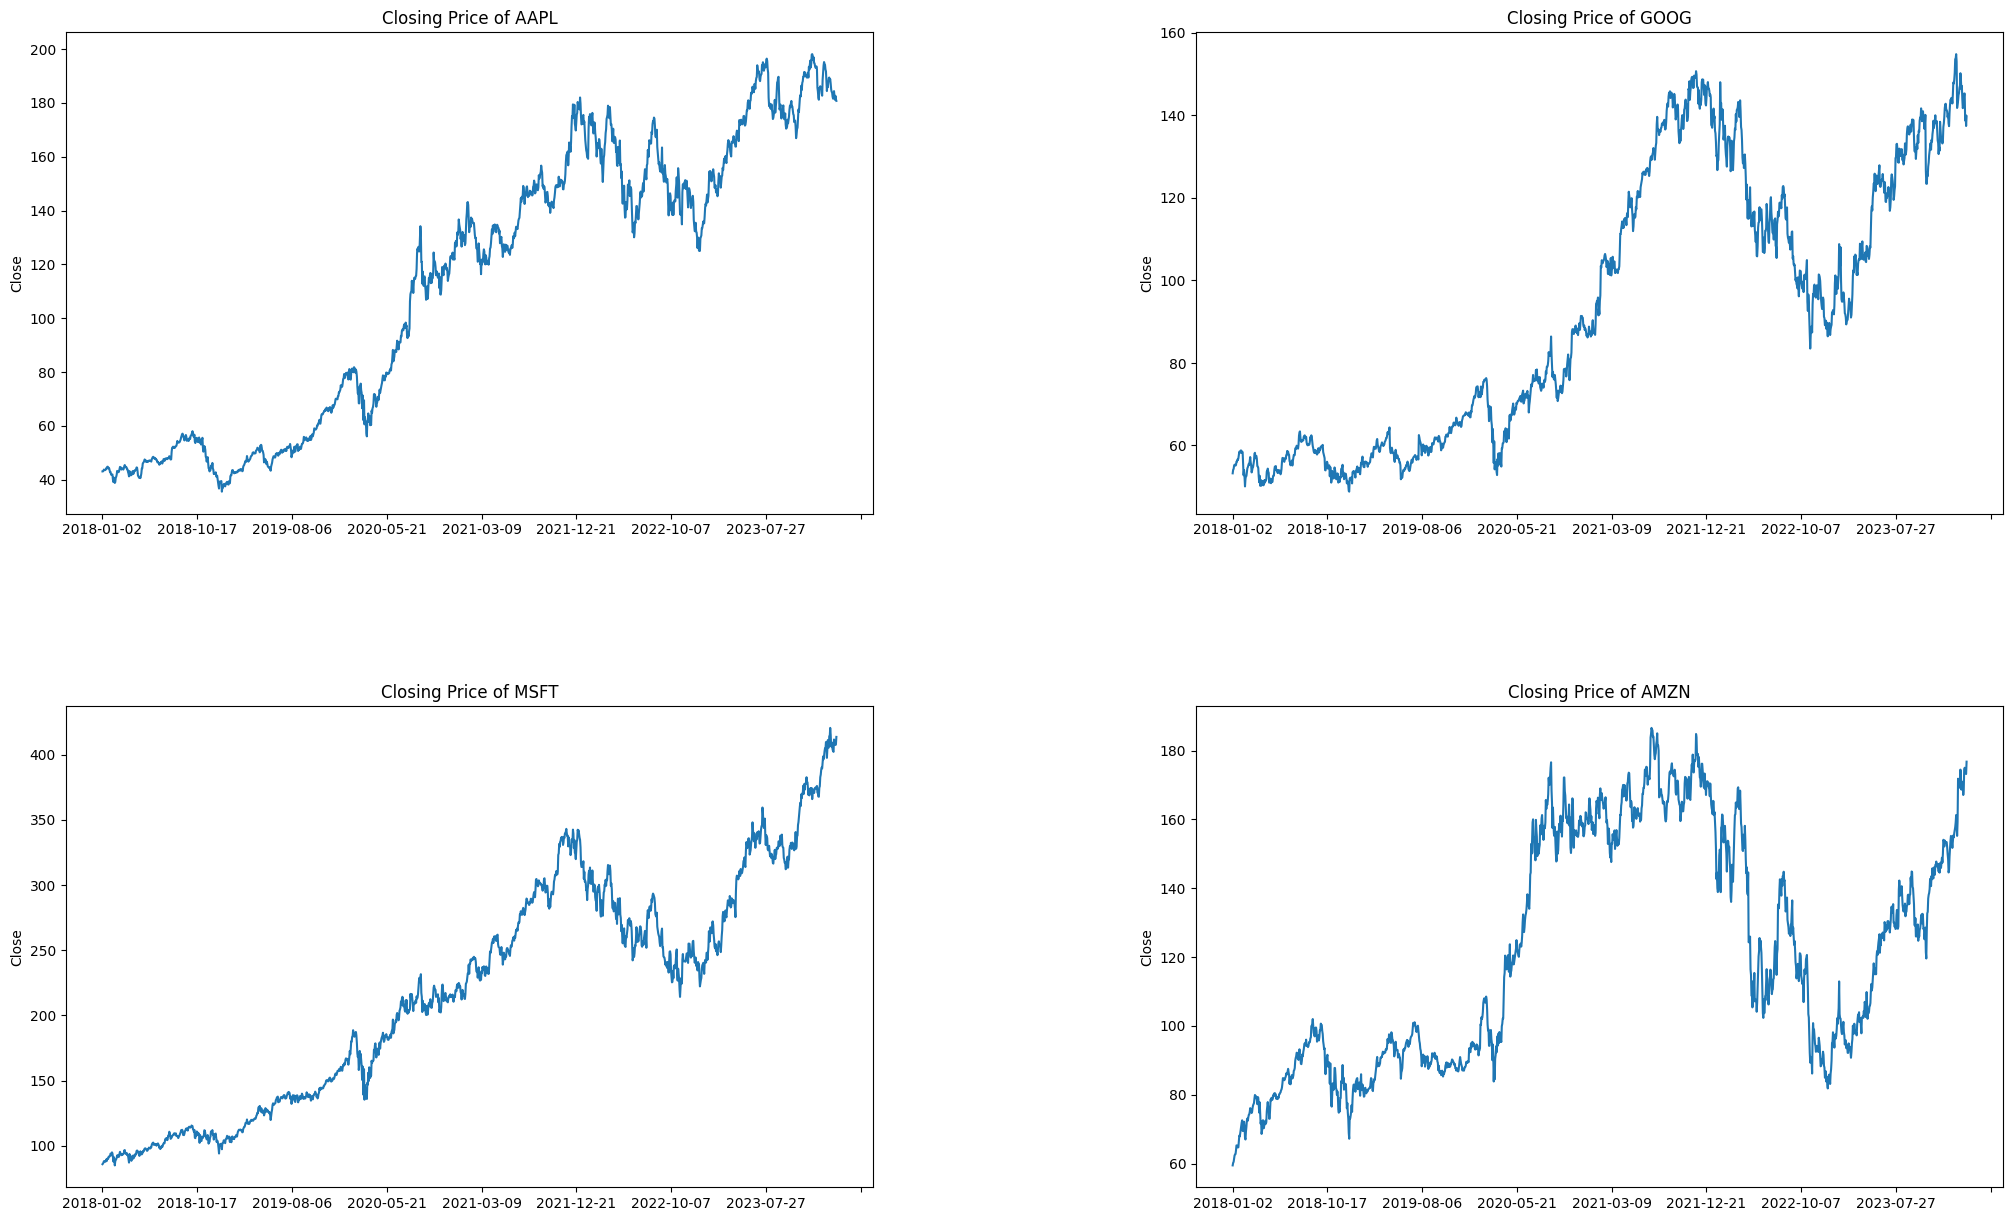

In [86]:
# Adjust the width and height of the digital adjustment image
plt.figure(figsize=(25, 15))

# Draw a stock closing price graph
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    df[df['ticker'] == company]['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_list[i - 1]}")

# Adjust the spacing between subimages
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show graphics
plt.show()

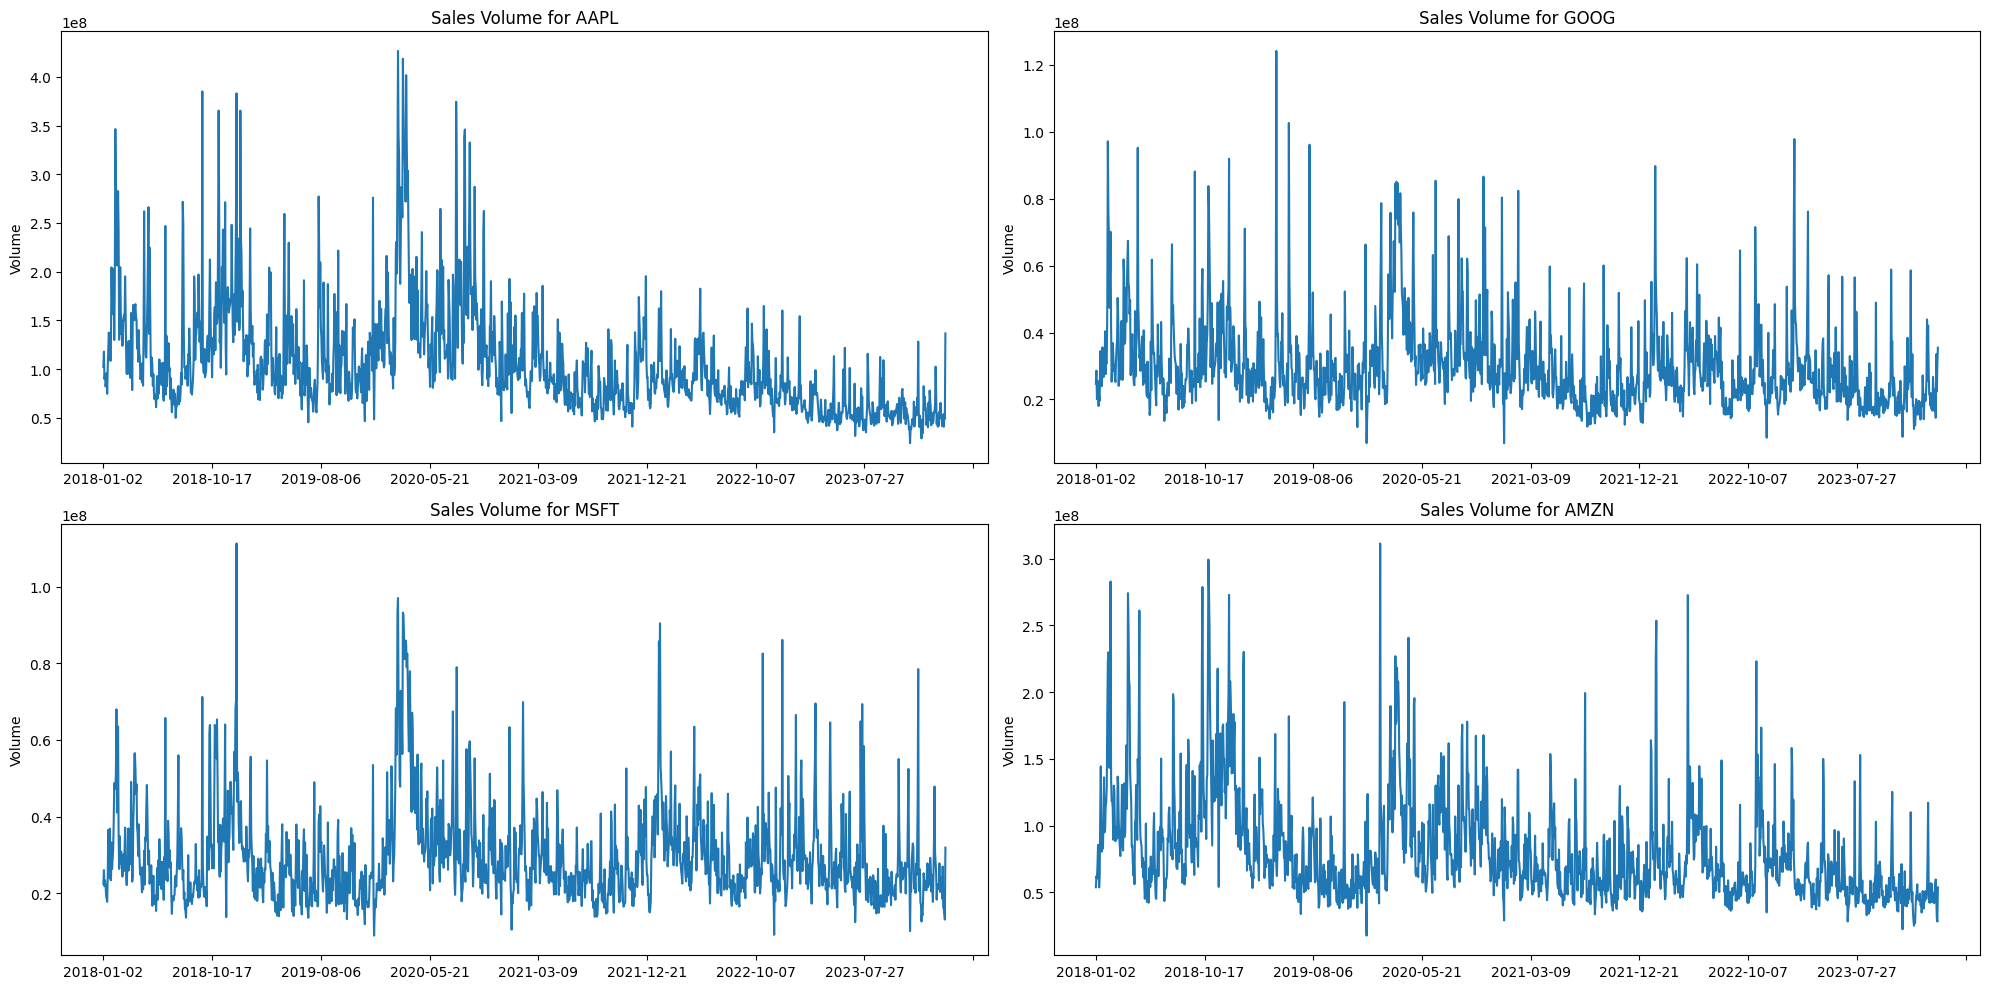

In [87]:
# Draw stock volume curve chart
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    df[df['ticker'] == company]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_list[i - 1]}")

plt.tight_layout()
plt.show()

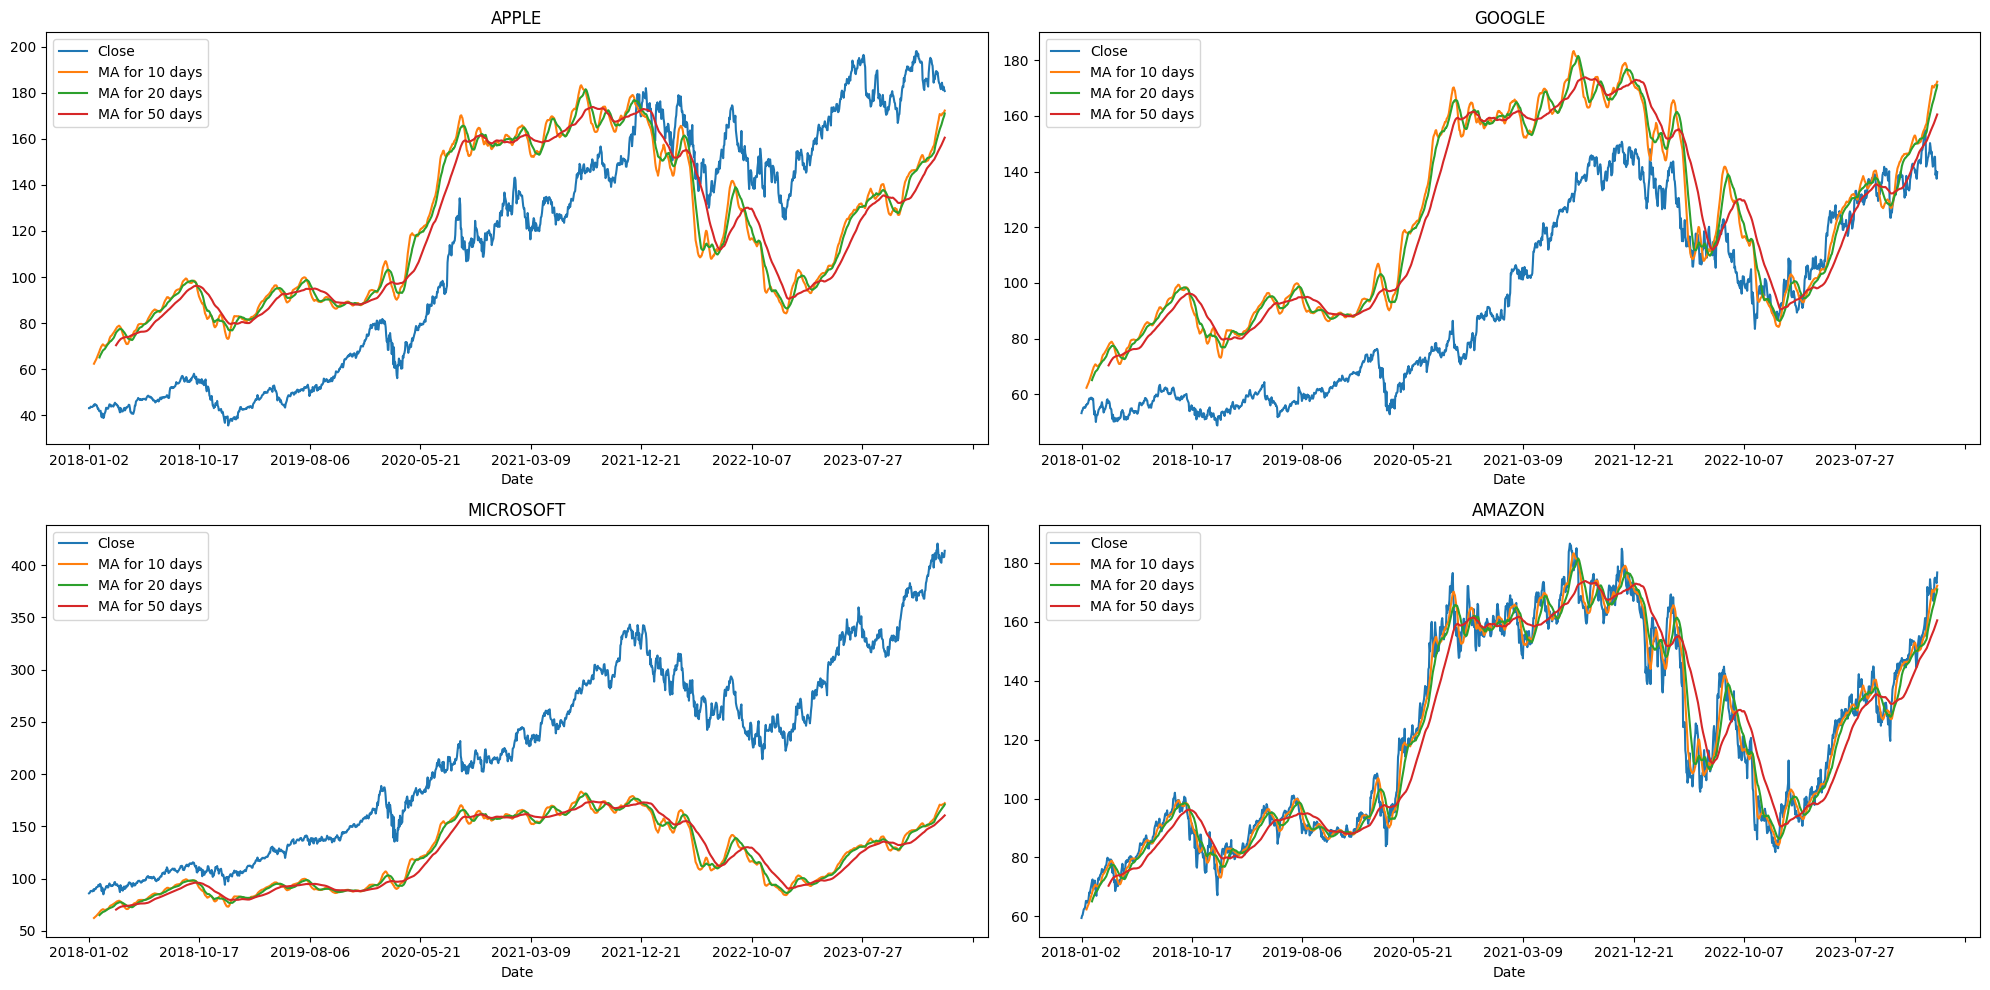

In [88]:
# Draw 10-day, 20-day, and 50-day cumulative curve charts of stock closing prices
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        df[column_name] = df[df['ticker'] == company]['Close'].rolling(ma).mean()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)

df[df['ticker'] == 'AAPL'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

df[df['ticker'] == 'GOOG'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('GOOGLE')

df[df['ticker'] == 'MSFT'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

df[df['ticker'] == 'AMZN'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

fig.tight_layout()
plt.show()

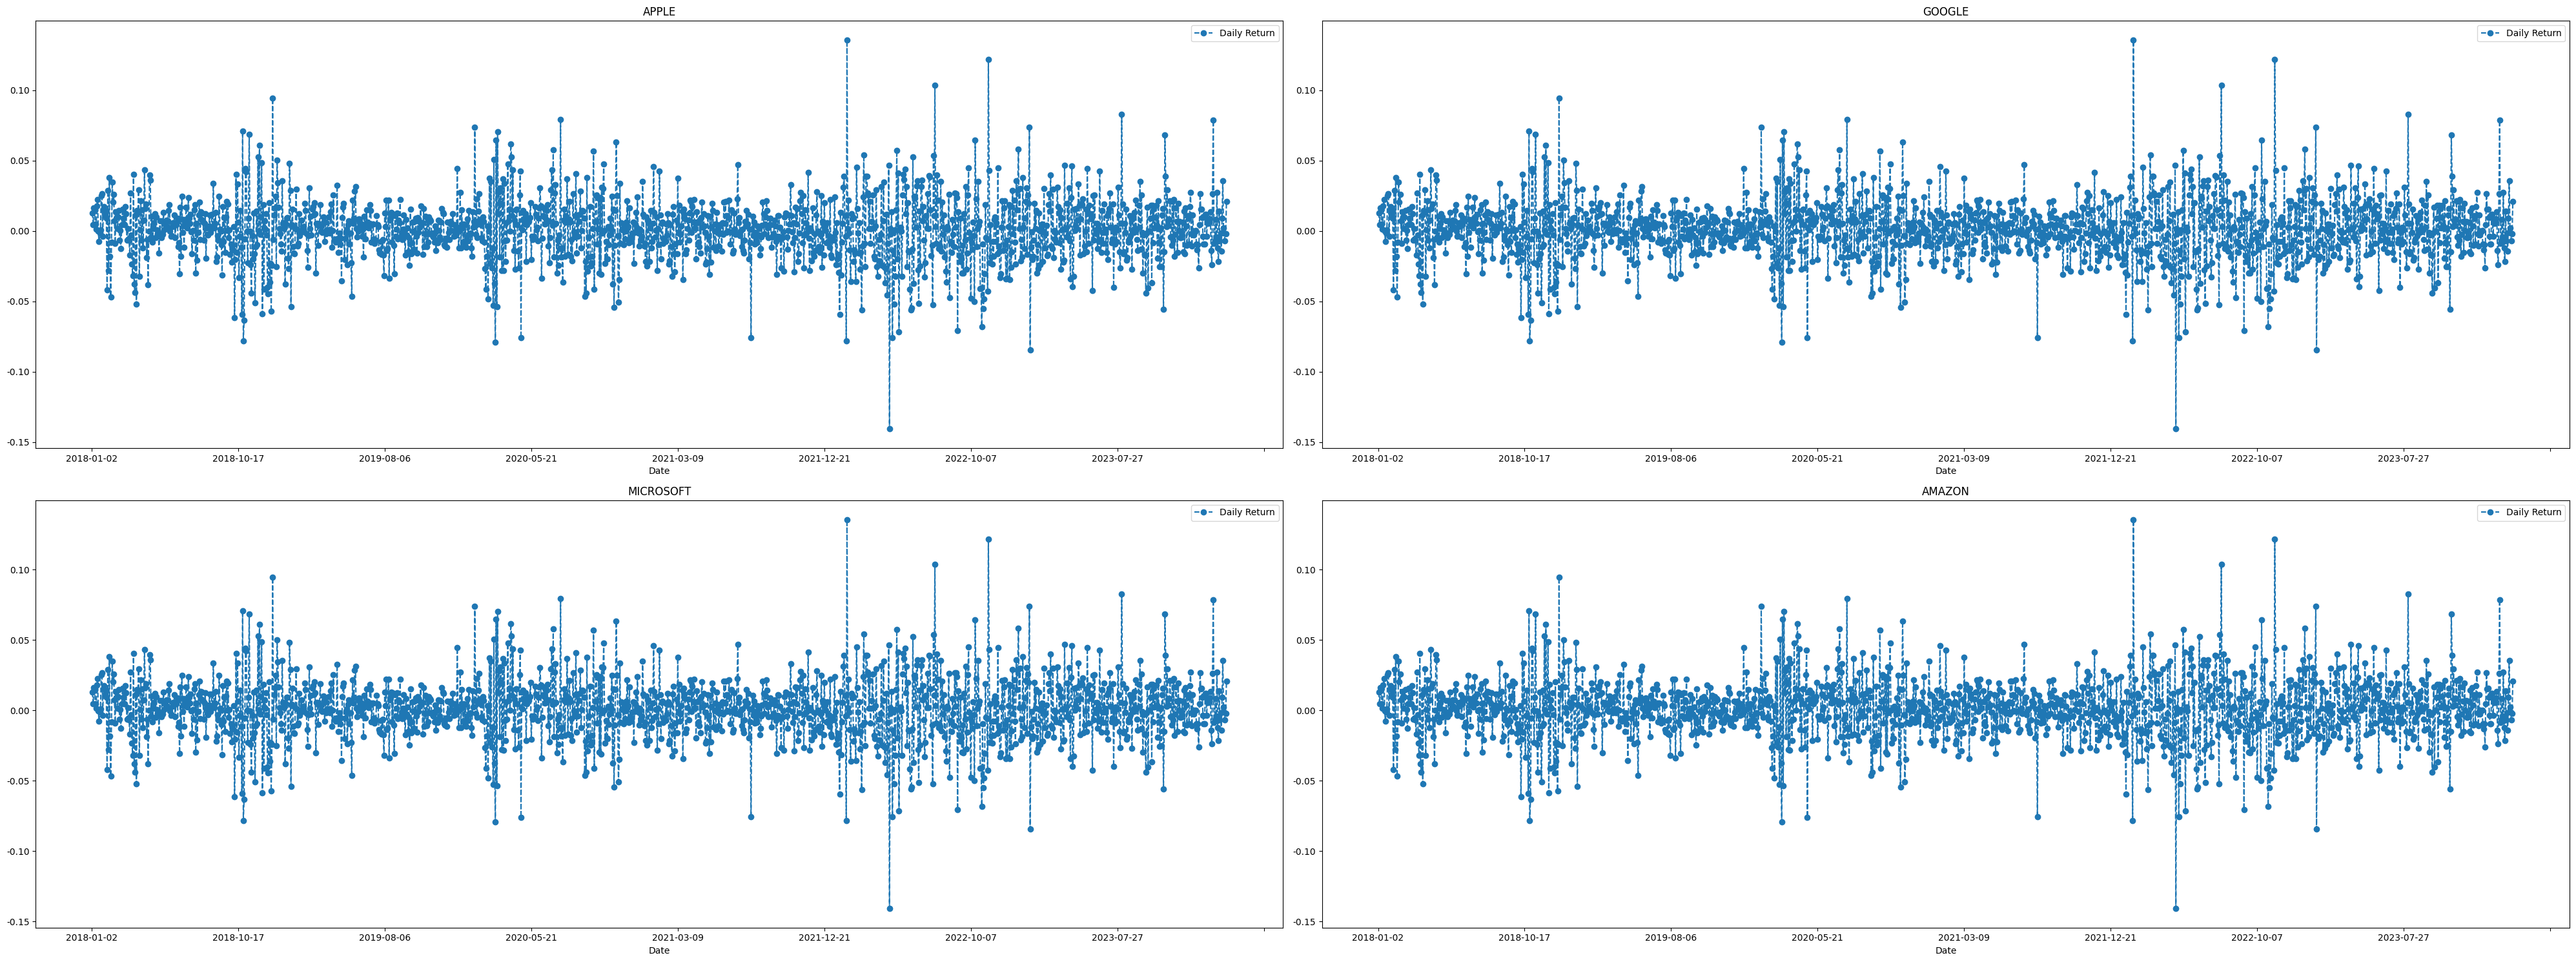

In [89]:
# Draw a stock daily return curve chart
for company in company_list:
    df['Daily Return'] = df[df['ticker'] == company]['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40, 15))

df[df['ticker'] == 'AAPL']['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('APPLE')

df[df['ticker'] == 'GOOG']['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('GOOGLE')

df[df['ticker'] == 'MSFT']['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('MICROSOFT')

df[df['ticker'] == 'AMZN']['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('AMAZON')

fig.tight_layout()
plt.show()

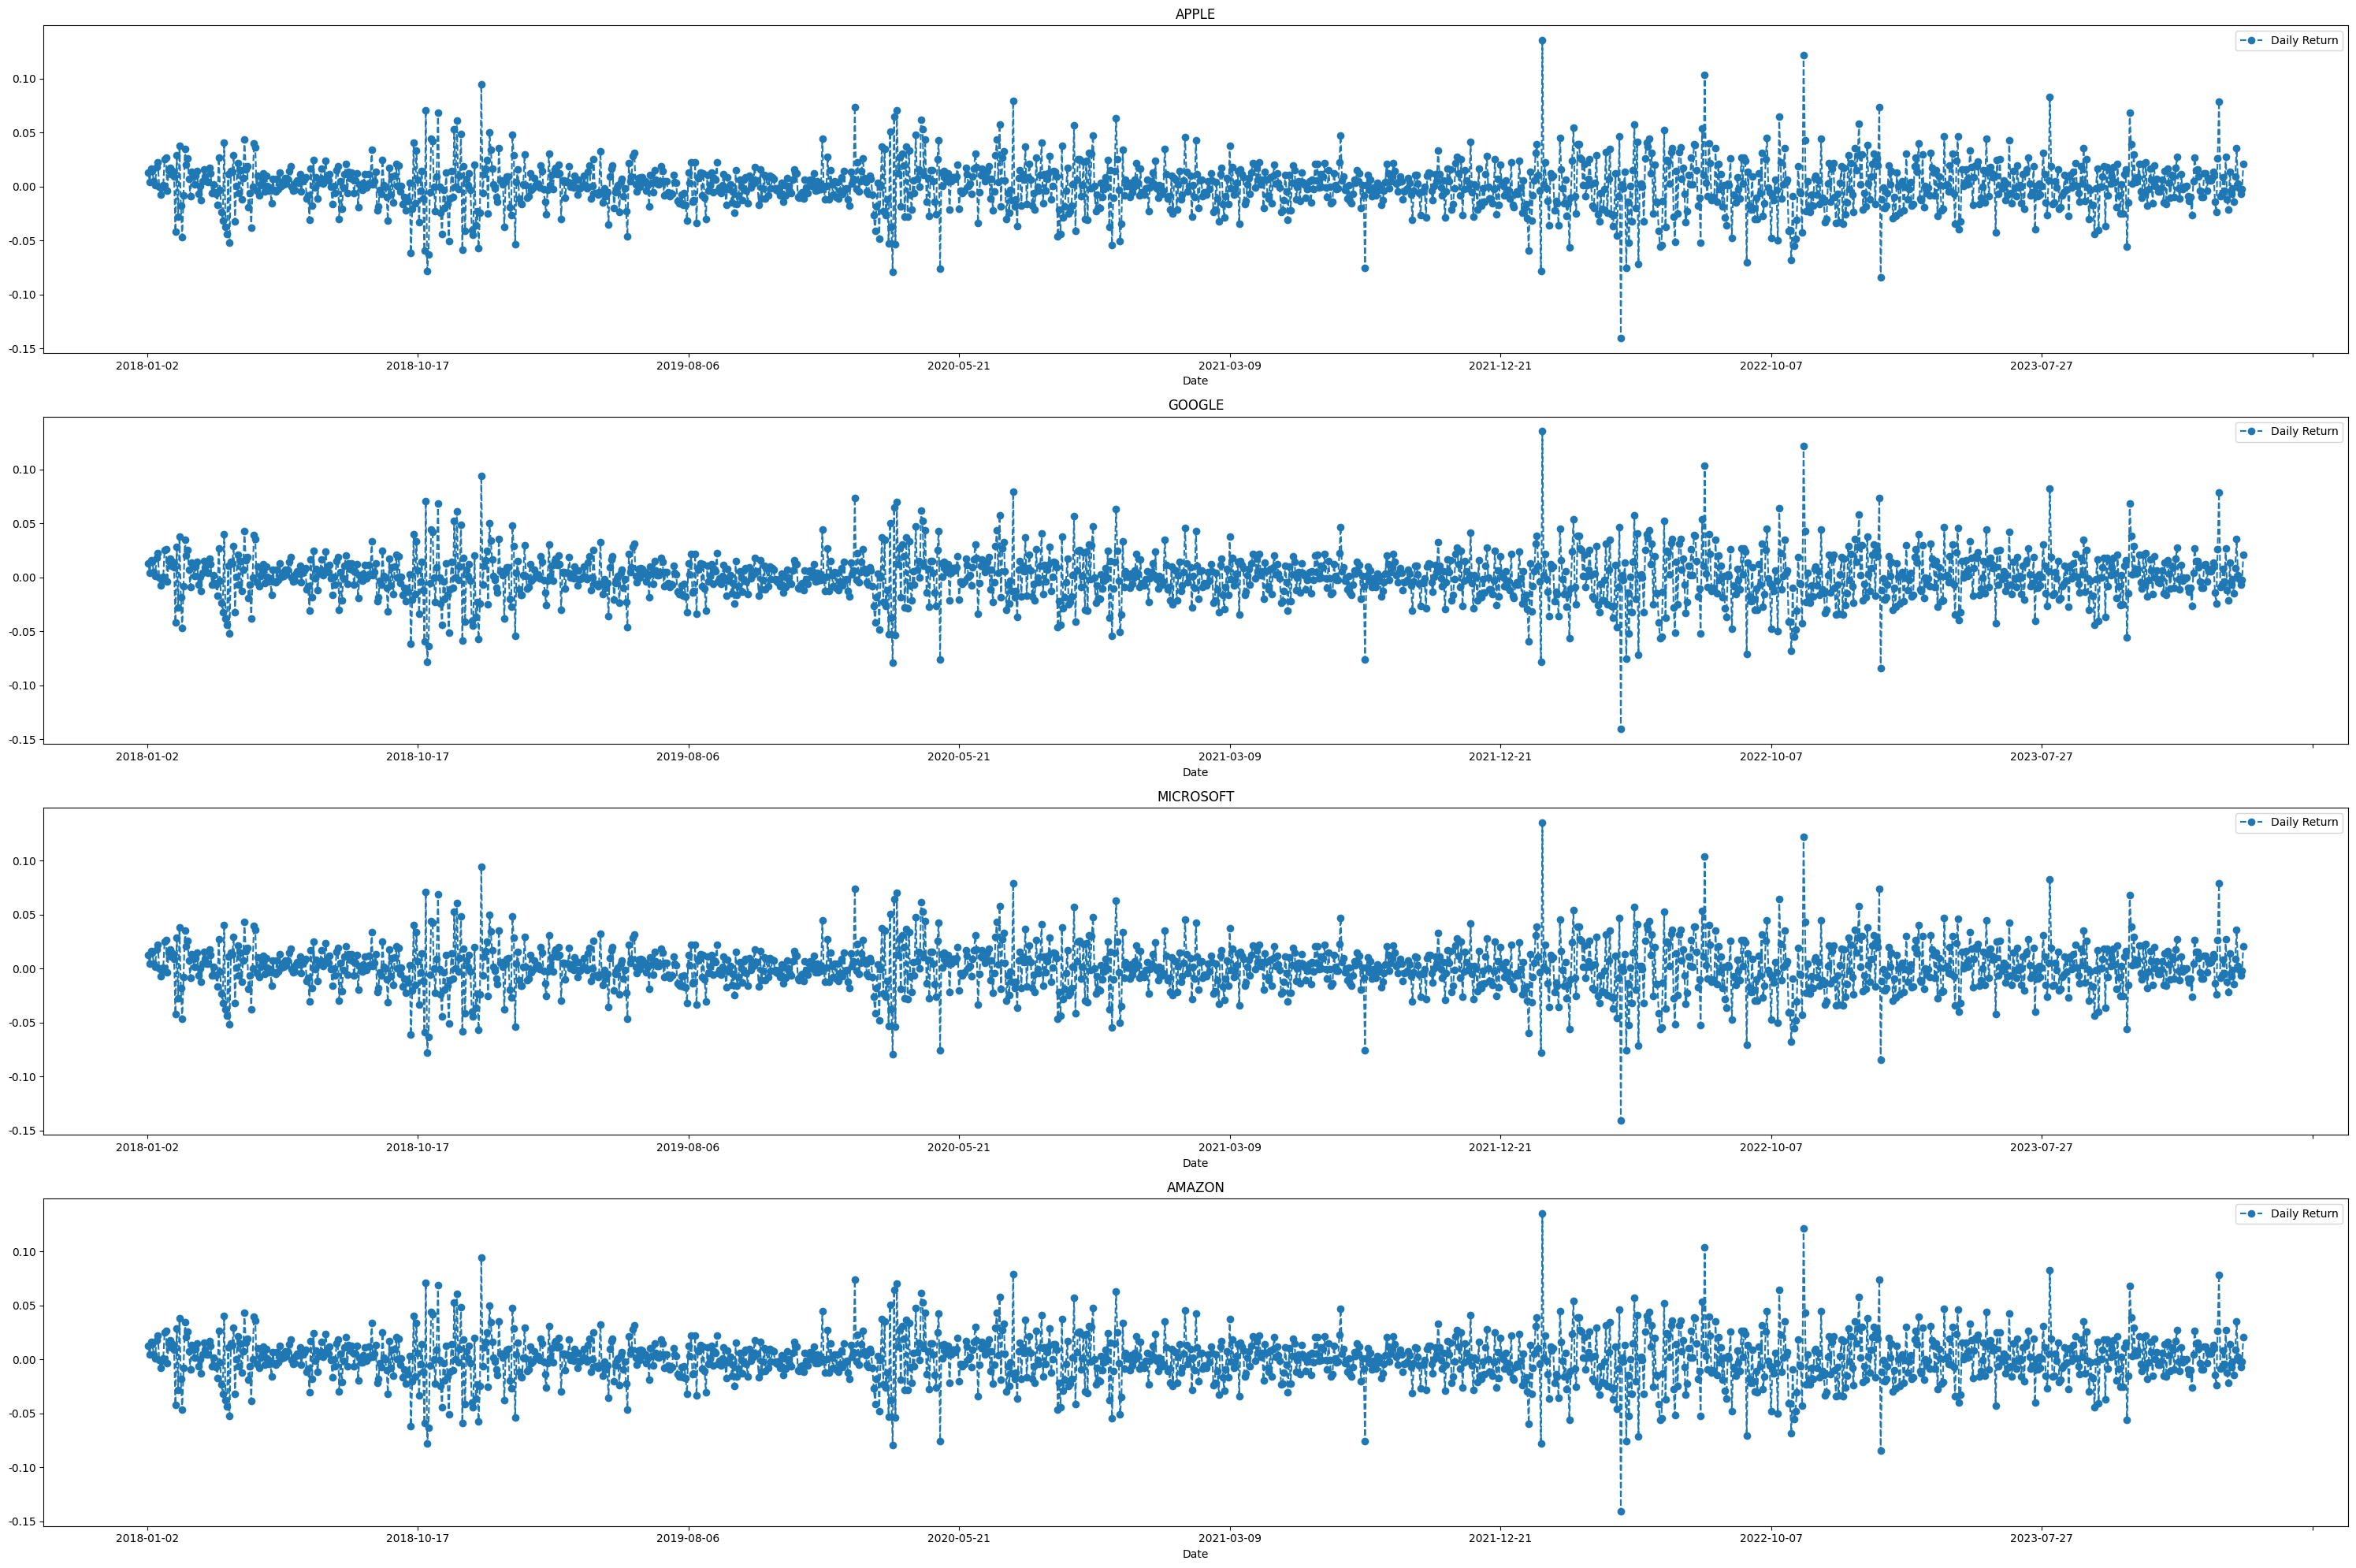

In [90]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(30, 20))

# Draw a stock daily return curve chart
df[df['ticker'] == 'AAPL']['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('APPLE')

df[df['ticker'] == 'GOOG']['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('GOOGLE')

df[df['ticker'] == 'MSFT']['Daily Return'].plot(ax=axes[2], legend=True, linestyle='--', marker='o')
axes[2].set_title('MICROSOFT')

df[df['ticker'] == 'AMZN']['Daily Return'].plot(ax=axes[3], legend=True, linestyle='--', marker='o')
axes[3].set_title('AMAZON')

fig.tight_layout()
plt.show()

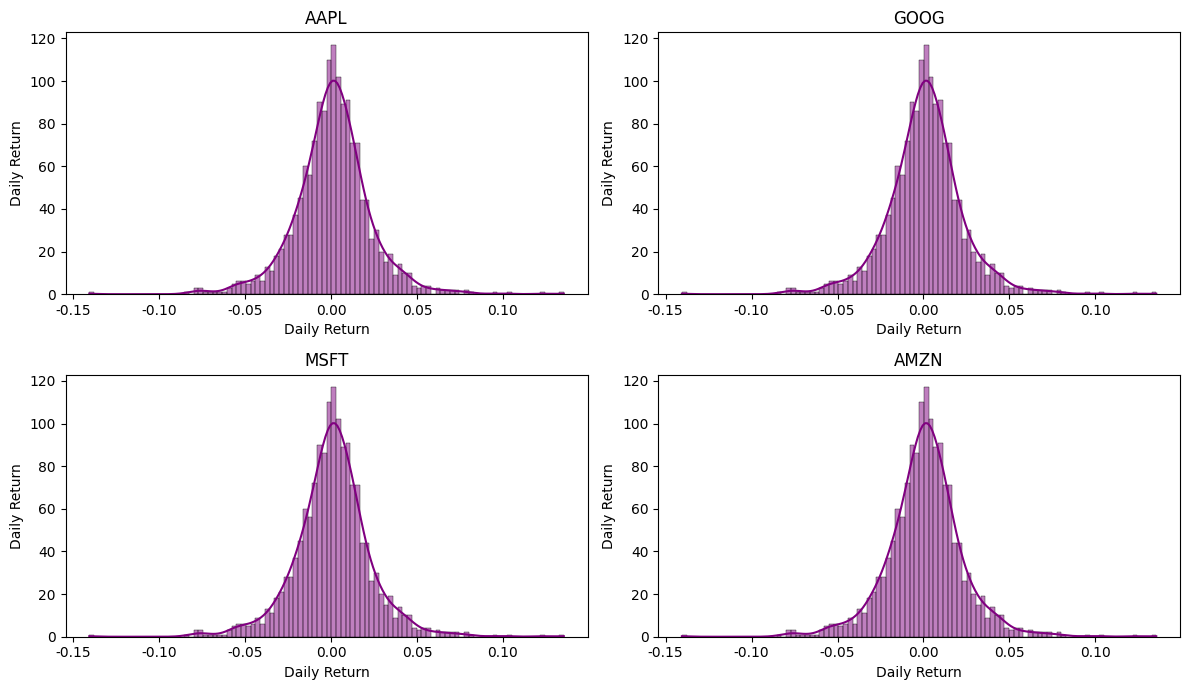

In [91]:
#Draw a histogram of daily stock returns
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[df['ticker'] == company]['Daily Return'].dropna(), bins=100, color='purple', kde=True)
    plt.ylabel('Daily Return')
    plt.title(f'{company_list[i - 1]}')

plt.tight_layout()
plt.show()

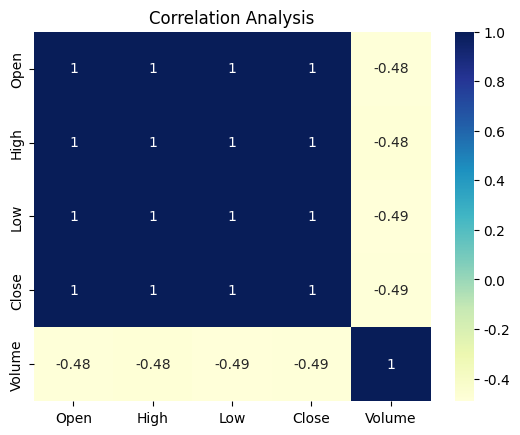

In [92]:
# correlation analysis
df_tmp1 = df_AAPL[['Open', 'High', 'Low', 'Close', 'Volume']]
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.heatmap(df_tmp1.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation Analysis")
plt.show()

In [93]:
print(df_AAPL.columns)
print(df_AAPL.head())

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ticker'], dtype='object')
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2018-01-02  42.540001  43.075001  42.314999  43.064999  40.670975  102223600   
2018-01-03  43.132500  43.637501  42.990002  43.057499  40.663898  118071600   
2018-01-04  43.134998  43.367500  43.020000  43.257500  40.852776   89738400   
2018-01-05  43.360001  43.842499  43.262501  43.750000  41.317894   94640000   
2018-01-08  43.587502  43.902500  43.482498  43.587502  41.164433   82271200   

           ticker  
Date               
2018-01-02   AAPL  
2018-01-03   AAPL  
2018-01-04   AAPL  
2018-01-05   AAPL  
2018-01-08   AAPL  


数据处理

In [94]:
# Data normalization
from sklearn.preprocessing import MinMaxScaler

train_data['Close']
test_data['Close']
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(np.array(train_data['Close']).reshape(-1,1))
validate_scaled = scaler.transform(np.array(validate_data['Close']).reshape(-1,1))
test_scaled = scaler.transform(np.array(test_data['Close']).reshape(-1,1))

In [95]:
# define outout and input,split by a time step
train_X = train_scaled[:-1]         # 除了最后一个样本之外的所有样本
train_Y = train_scaled[1:]          # 除了第一个样本之外的所有样本
validate_X = validate_scaled[:-1]
validate_Y = validate_scaled[1:]
test_X = test_scaled[:-1]
test_Y = test_scaled[1:]
print(train_X.shape, train_Y.shape)
print(validate_X.shape, validate_Y.shape)
print(test_X.shape, test_Y.shape)

(5531, 1) (5531, 1)
(503, 1) (503, 1)
(163, 1) (163, 1)


In [96]:
# Modeling
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(1,1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
# 超参数调优，需要在模型性能和训练效率之间进行权衡，然后评估模型在验证集上的表现，以选择最合适的值。

In [97]:
# Compile model
model.compile(optimizer='adam', loss='mse')


In [98]:
# Training model
history = model.fit(train_X, train_Y, validation_data=(validate_X, validate_Y), batch_size=32, epochs=100)  # 较大的 epochs 数量也可能增加过拟合的风险

print(model.summary())

Epoch 1/100
173/173 [==============================] - 15s 27ms/step - loss: 0.0127 - val_loss: 0.0025
Epoch 2/100
173/173 [==============================] - 2s 11ms/step - loss: 7.3423e-04 - val_loss: 0.0019
Epoch 3/100
173/173 [==============================] - 3s 17ms/step - loss: 6.2185e-04 - val_loss: 0.0019
Epoch 4/100
173/173 [==============================] - 3s 19ms/step - loss: 6.0346e-04 - val_loss: 0.0019
Epoch 5/100
173/173 [==============================] - 2s 14ms/step - loss: 5.7216e-04 - val_loss: 0.0019
Epoch 6/100
173/173 [==============================] - 2s 12ms/step - loss: 4.8338e-04 - val_loss: 0.0019
Epoch 7/100
173/173 [==============================] - 2s 12ms/step - loss: 5.1680e-04 - val_loss: 0.0019
Epoch 8/100
173/173 [==============================] - 2s 13ms/step - loss: 4.3769e-04 - val_loss: 0.0019
Epoch 9/100
173/173 [==============================] - 4s 20ms/step - loss: 5.0283e-04 - val_loss: 0.0018
Epoch 10/100
173/173 [===========================

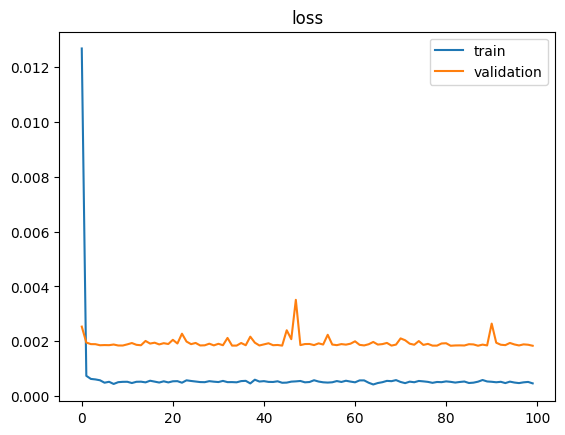

In [99]:
# plot training history  用验证集绘制损失函数
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend()
plt.show()

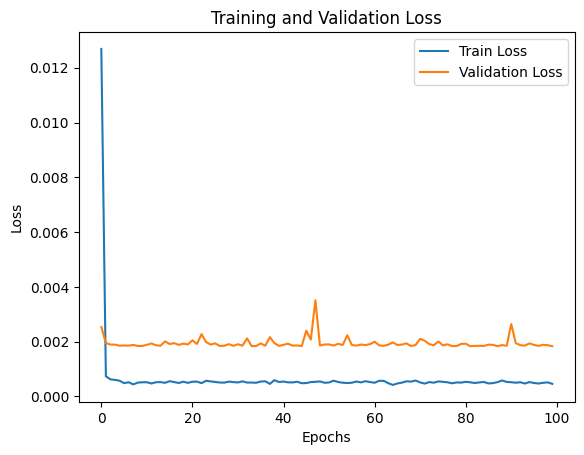

In [100]:
# 获取训练过程中的损失函数值
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 绘制损失函数曲线
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [101]:
# prediction
predictions = model.predict(validate_X)
predictions = scaler.inverse_transform(predictions).reshape(len(validate_Y),)
validate_Y = scaler.inverse_transform(validate_Y).reshape(len(validate_Y),)

16/16 [==============================] - 3s 10ms/step


In [102]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(predictions, validate_Y))    # 均方根误差
rmse

13.380671035946971

In [103]:
# Model evaluation
print('LSTM regression model mean square error MSE：{}'.format(
    round(metrics.mean_squared_error(validate_Y, predictions), 2)))  # Print the mean square error value of the model  均方误差
print('LSTM regression model explained variance score：{}'.format(
    round(metrics.explained_variance_score(validate_Y, predictions), 2)))  # Print the model’s explained variance value
print('LSTM regression model R-squared score：{}'.format(
    round(metrics.r2_score(validate_Y, predictions), 2)))  # Print the R-squared value of the model

LSTM regression model mean square error MSE：179.04
LSTM regression model explained variance score：0.98
LSTM regression model R-squared score：0.98


<Figure size 640x480 with 0 Axes>

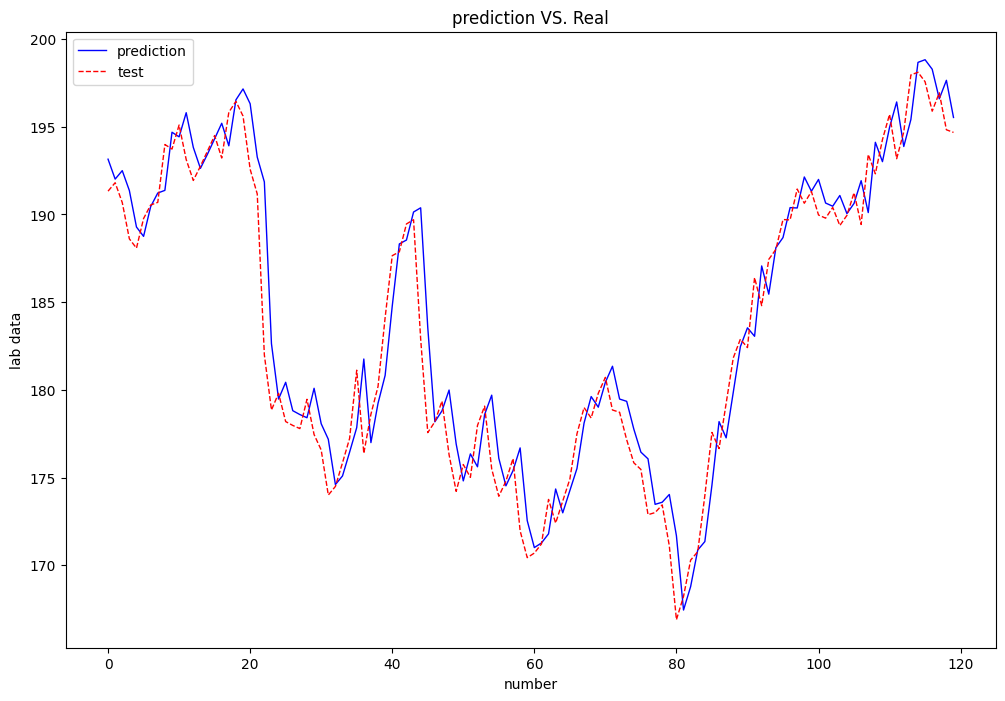

In [104]:
# Comparison chart of actual values and predicted values
x = np.arange(0, 120, 1)  # Generate numbers from 0 to 120
y1 = predictions[0:120]  # Get forecast data
y2 = validate_Y[0:120]  # Get test set label data
plt.figure()  # Specify subgraph
plt.figure(figsize=(12, 8))
# Make a drawing, which is the color, line width, etc.
plt.plot(x, y1, color='blue', linewidth='1.0', label='prediction')
plt.plot(x, y2, color='red', linewidth='1.0', linestyle='--', label='test')
plt.xlabel('number')  # Set X-axis title
plt.ylabel('lab data')  # Set y-axis title
plt.legend()  # Show legend
plt.title('prediction VS. Real')
plt.show()  # Display diagram